In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from tensorflow import keras as kr
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import matplotlib.pyplot as plt

In [2]:
# upload
print('Uploading...')
exp_matrix = pd.read_csv('/root/work/data/sub/stad_exp_sub', index_col=0)
label = pd.read_csv('/root/work/data/sub/stad_label_sub')
print('Uploading done!')

Uploading...
Uploading done!


In [4]:
# data preprocessing
x = exp_matrix.T

# str -> int
y = np.array(label['Molecular.Subtype'].map({'CIN':0, 'GS':1, 'MSI':2, 'EBV':3}).astype(int))

train_x, test_x, train_y_t, test_y_t = train_test_split(x, y, test_size=0.3, random_state=np.random.seed())
print(train_x.shape, test_x.shape, train_y_t.shape, test_y_t.shape)

# int -> onthot
train_y = kr.utils.to_categorical(train_y_t)
test_y = kr.utils.to_categorical(test_y_t)

(182, 12411) (78, 12411) (182,) (78,)


In [4]:
model = Sequential()
model.add(Dense(1024, input_dim=train_x.shape[1], kernel_initializer='uniform', activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,kernel_initializer='uniform',activation='relu'))
model.add(Dense(128,kernel_initializer='uniform',activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(4,kernel_initializer='uniform',activation='softmax'))

model.compile(loss=kr.losses.CategoricalCrossentropy(), optimizer='adam', metrics=['categorical_accuracy'])
#sgd = kr.optimizers.SGD(learning_rate=0.001)

In [5]:
def show_train_history(train_history, train, validation):

    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title(train)
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

Epoch 1/50
2/2 [==============================] - 0s 73ms/step - loss: 2.0429e-05 - categorical_accuracy: 1.0000 - val_loss: 1.3533 - val_categorical_accuracy: 0.8421
Epoch 2/50
2/2 [==============================] - 0s 43ms/step - loss: 2.3657e-05 - categorical_accuracy: 1.0000 - val_loss: 1.3563 - val_categorical_accuracy: 0.8421
Epoch 3/50
2/2 [==============================] - 0s 39ms/step - loss: 9.5245e-06 - categorical_accuracy: 1.0000 - val_loss: 1.3595 - val_categorical_accuracy: 0.8421
Epoch 4/50
2/2 [==============================] - 0s 41ms/step - loss: 1.4088e-05 - categorical_accuracy: 1.0000 - val_loss: 1.3624 - val_categorical_accuracy: 0.8421
Epoch 5/50
2/2 [==============================] - 0s 40ms/step - loss: 4.8738e-05 - categorical_accuracy: 1.0000 - val_loss: 1.3639 - val_categorical_accuracy: 0.8421
Epoch 6/50
2/2 [==============================] - 0s 42ms/step - loss: 1.5787e-05 - categorical_accuracy: 1.0000 - val_loss: 1.3662 - val_categorical_accuracy: 0.842

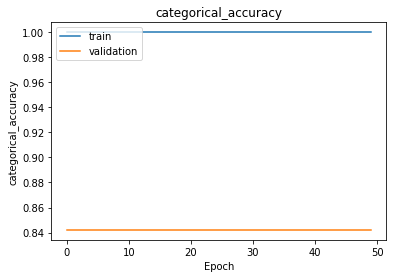

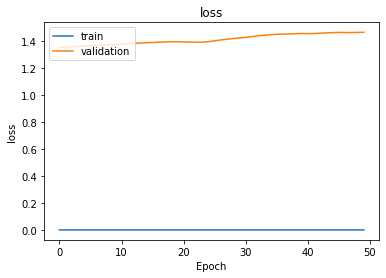

In [8]:
b = 128
train_history=model.fit(train_x,
                        train_y,
                        epochs=50,
                        validation_split=0.1,
                        batch_size=b)


show_train_history(train_history, 'categorical_accuracy', 'val_categorical_accuracy')
show_train_history(train_history, 'loss', 'val_loss')


In [41]:
# accuracy
my = []
rf = []
dt = []
svm = []
lr = []
knn = []
nb = []
for i in range(2):
    # my

    train_x, test_x, train_y_t, test_y_t = train_test_split(x, y, test_size=0.3, random_state=np.random.seed())
    print(train_x.shape, test_x.shape, train_y_t.shape, test_y_t.shape)
    # int -> onthot
    train_y = kr.utils.to_categorical(train_y_t)
    test_y = kr.utils.to_categorical(test_y_t)
    loss, accuracy = model.evaluate(test_x, test_y)
    my.append(accuracy)

    clf=RandomForestClassifier()  
    clf = clf.fit(train_x,train_y_t)
    score1 = clf.score(test_x,test_y_t)
    rf.append(score1)

    clf2 = tree.DecisionTreeClassifier()
    clf2 = clf2.fit(train_x, train_y_t)
    score2 = clf2.score(test_x,test_y_t)
    dt.append(score2)

    clf3 = SVC(kernel='linear')
    clf3.fit(train_x,train_y_t)
    y_pred = clf3.predict(test_x)
    score3 = metrics.accuracy_score(test_y_t, y_pred)
    svm.append(score3)

    clf4 = linear_model.LogisticRegression(C=1e5)
    clf4.fit(train_x,train_y_t)
    score4 = clf4.score(test_x,test_y_t)
    lr.append(score4)

    clf5 = KNeighborsClassifier()
    clf5.fit(train_x,train_y_t)
    y_pred = clf5.predict(test_x)
    score5 = metrics.accuracy_score(test_y_t, y_pred)
    knn.append(score5)

    clf6 = GaussianNB()
    clf6 = clf6.fit(train_x,train_y_t)
    y_pred = clf6.predict(test_x)
    score6 = metrics.accuracy_score(test_y_t, y_pred)
    nb.append(score6)

(182, 12411) (78, 12411) (182,) (78,)
3/3 [==============================] - 0s 7ms/step - loss: 0.7455 - categorical_accuracy: 0.9359
(182, 12411) (78, 12411) (182,) (78,)
3/3 [==============================] - 0s 5ms/step - loss: 0.3657 - categorical_accuracy: 0.9359
(182, 12411) (78, 12411) (182,) (78,)
3/3 [==============================] - 0s 4ms/step - loss: 1.7814 - categorical_accuracy: 0.8718
(182, 12411) (78, 12411) (182,) (78,)
3/3 [==============================] - 0s 5ms/step - loss: 0.3864 - categorical_accuracy: 0.9744
(182, 12411) (78, 12411) (182,) (78,)
3/3 [==============================] - 0s 6ms/step - loss: 1.0096 - categorical_accuracy: 0.8974
(182, 12411) (78, 12411) (182,) (78,)
3/3 [==============================] - 0s 6ms/step - loss: 0.7663 - categorical_accuracy: 0.9615
(182, 12411) (78, 12411) (182,) (78,)
3/3 [==============================] - 0s 6ms/step - loss: 1.3067 - categorical_accuracy: 0.9231
(182, 12411) (78, 12411) (182,) (78,)
3/3 [============

In [45]:
evaluate_result = pd.DataFrame([my,rf,dt,svm,lr,knn,nb], index=['my','rf','dt','svm','lr','knn','nb'])
evaluate_result

,0,1,2,3,4,5,6,7,8,9
my,0.935897,0.935897,0.871795,0.974359,0.897436,0.961538,0.923077,0.923077,0.910256,0.897436
rf,0.833333,0.782051,0.743590,0.833333,0.730769,0.833333,0.743590,0.743590,0.833333,0.782051
dt,0.653846,0.679487,0.666667,0.743590,0.705128,0.512821,0.730769,0.717949,0.743590,0.628205
svm,0.897436,0.833333,0.807692,0.884615,0.846154,0.846154,0.820513,0.820513,0.871795,0.858974
lr,0.910256,0.846154,0.833333,0.871795,0.846154,0.820513,0.769231,0.833333,0.884615,0.858974
knn,0.666667,0.679487,0.653846,0.730769,0.705128,0.628205,0.730769,0.628205,0.705128,0.730769
nb,0.820513,0.756410,0.730769,0.794872,0.794872,0.807692,0.756410,0.743590,0.833333,0.782051


In [3]:
from keras.models import load_model

# # 保存训练好的model为hdf5文件
# model.save('/root/work/model/stad_subtype_model.h5')  
# 重新加载模型
model = load_model('/root/work/model/stad_subtype_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              12709888  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               131200    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 516       
Total params: 12,858,116
Trainable params: 12,858,116
Non-trainable params: 0
____________________________________________

In [10]:
# from tensorflow.keras.utils import plot_model
# plot_model(model, show_shapes=True)

In [5]:
loss, accuracy = model.evaluate(test_x, test_y)
print('test loss: ', loss)
print('test accuracy: ', accuracy)

3/3 [==============================] - 0s 7ms/step - loss: 1.0207 - categorical_accuracy: 0.9359
test loss:  1.020721435546875
test accuracy:  0.9358974099159241


In [46]:
from scipy import interp
from sklearn.metrics import roc_curve, auc

n_classes = train_y.shape[1]
# Plot linewidth.
lw = 2

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
y_score = model.predict(test_x)
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test_y[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test_y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


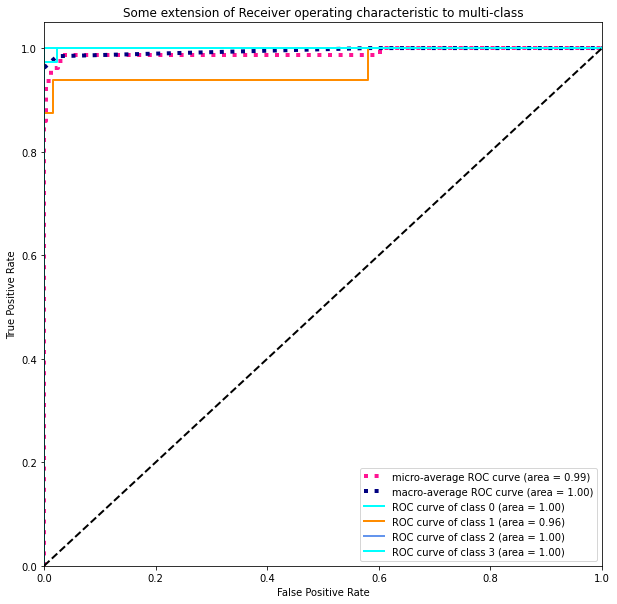

In [47]:
from itertools import cycle
plt.figure(figsize=(10, 10))
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_true = np.argmax(test_y, axis=-1).reshape(test_y.shape[0],1)
y_pred = np.argmax(model.predict(test_x).astype(np.int64), axis=-1).reshape(test_y.shape[0],1)
cm = confusion_matrix(y_true,y_pred)
cm = pd.DataFrame(cm, columns=['CIN', 'GS', 'MSI', 'EBV'], index=['CIN', 'GS', 'MSI', 'EBV'])
cm

,CIN,GS,MSI,EBV
CIN,48,1,0,0
GS,6,9,0,0
MSI,1,0,7,0
EBV,3,0,0,3


In [7]:
cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
np.set_printoptions(formatter={"float": "{: 0.2f}".format})
cm

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


,CIN,GS,MSI,EBV
CIN,0.979592,0.020408,0.000,0.0
GS,0.400000,0.600000,0.000,0.0
MSI,0.125000,0.000000,0.875,0.0
EBV,0.500000,0.000000,0.000,0.5


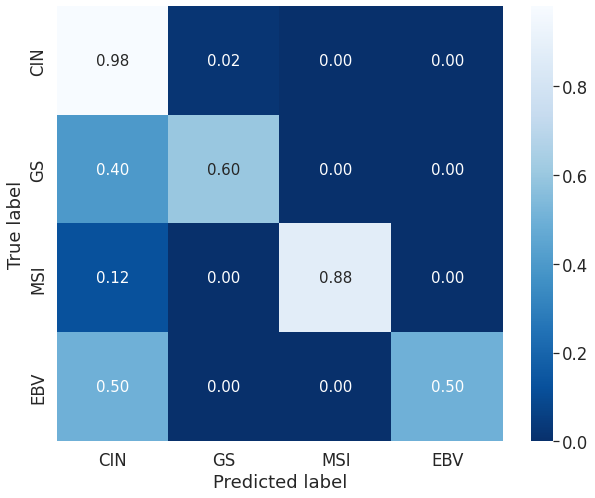

In [15]:
sns.set(font_scale=1.5)
plt.figure(figsize=(10, 8))
plt.rc('font', size=15)
sns.heatmap(cm,cmap="Blues_r", annot=True , fmt='.2f')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [16]:
import tensorflow as tf
import keras.backend as K
def Precision(model,test_x,test_y):
    y_pred = model.predict(test_x)
    y_pred = np.argmax(y_pred, axis=-1)
    tp = K.sum(K.round(K.clip(test_y * y_pred, 0, 1)))  # true positives
    tp = tf.cast(tp,dtype=tf.float64)
    pp = K.sum(K.round(K.clip(y_pred, 0, 1)))  # predicted positives
    pp = tf.cast(pp,dtype=tf.float64)
    precision = tp / (pp + K.epsilon())
    return precision

def Recall(model,test_x,test_y):
    y_pred = model.predict(test_x)
    y_pred = np.argmax(y_pred, axis=-1)
    tp = K.sum(K.round(K.clip(test_y * y_pred, 0, 1)))  # true positives
    tp = tf.cast(tp,dtype=tf.float64)
    pp = K.sum(K.round(K.clip(test_y, 0, 1)))  # possible positives
    pp = tf.cast(pp,dtype=tf.float64)
    recall = tp / (pp + K.epsilon())
    return recall

def F1(model,test_x,test_y):
    precision = Precision(model,test_x,test_y)
    recall = Recall(model,test_x,test_y)
    f1 = 2 * ((precision * recall) / (precision + recall + K.epsilon()))
    return f1

In [18]:
p = []
r = []
f1 = []
for i in range(10):
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=np.random.seed())
    p.append(Precision(model,test_x,test_y).numpy())
    r.append(Recall(model,test_x,test_y).numpy())
    f1.append(F1(model,test_x,test_y).numpy())

e_result = pd.DataFrame([p,r,f1], index=['Precision', 'Recall', 'F1'])
e_result

,0,1,2,3,4,5,6,7,8,9
Precision,0.947368,0.902439,0.837209,0.975000,0.894737,0.853659,0.930233,0.952381,0.976190,0.894737
Recall,1.000000,0.973684,1.000000,0.951220,1.000000,0.972222,0.952381,0.930233,1.000000,1.000000
F1,0.972973,0.936709,0.911392,0.962963,0.944444,0.909091,0.941176,0.941176,0.987952,0.944444


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [23]:
# Precision & Recall
my = []
rf = []
dt = []
svm = []
lr = []
knn = []
nb = []
for i in range(2):
    # my

    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=np.random.seed())
    # # int -> onthot
    # train_y = kr.utils.to_categorical(train_y_t)
    # test_y = kr.utils.to_categorical(test_y_t)
    my.append(Precision(model,test_x,test_y).numpy())

    clf=RandomForestClassifier()  
    clf = clf.fit(train_x,train_y)
    rf.append(Precision(clf,test_x,test_y).numpy())

    clf2 = tree.DecisionTreeClassifier()
    clf2 = clf2.fit(train_x, train_y)
    dt.append(Precision(clf2,test_x,test_y).numpy())

    clf3 = SVC(kernel='linear')
    clf3.fit(train_x,train_y)
    y_pred = clf3.predict(test_x)
    svm.append(Precision(clf3,test_x,test_y).numpy())

    clf4 = linear_model.LogisticRegression(C=1e5)
    clf4.fit(train_x,train_y)
    lr.append(Precision(clf4,test_x,test_y).numpy())

    clf5 = KNeighborsClassifier()
    clf5.fit(train_x,train_y)
    y_pred = clf5.predict(test_x)
    knn.append(Precision(clf5,test_x,test_y).numpy())

    clf6 = GaussianNB()
    clf6 = clf6.fit(train_x,train_y)
    y_pred = clf6.predict(test_x)
    nb.append(Precision(clf6,test_x,test_y).numpy())

PR_result = pd.DataFrame([my,rf,dt,svm,lr,knn,nb], index=['my','rf','dt','svm','lr','knn','nb'])
PR_result

,0,1
my,0.926829,0.921053
rf,38.999996,36.999996
dt,38.999996,36.999996
svm,38.999996,36.999996
lr,38.999996,36.999996
knn,38.999996,36.999996
nb,38.999996,36.999996


In [ ]:
from sklearn.metrics import roc_curve
y_pred = model.predict(test_x).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(test_y, y_pred)

from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Supervised transformation based on random forests
rf = RandomForestClassifier(max_depth=3, n_estimators=10)
rf.fit(train_x, train_y)

y_pred_rf = rf.predict_proba(test_x)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_y, y_pred_rf)
auc_rf = auc(fpr_rf, tpr_rf)

In [24]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()  #n_estimators表示弱学习器的最大迭代次数，或者说最大的弱学习器的个数。如果设置值太小，模型容易欠拟合；如果太大，计算量会较大，并且超过一定的数量后，模型提升很小
clf = clf.fit(train_x,train_y_t)
score1 = clf.score(test_x,test_y_t)
print('Random Forest Classifier result:', score1)

Random Forest Classifier result: 0.7435897435897436


In [25]:
# Desicion Tree
from sklearn import tree

clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(train_x, train_y_t)
score2 = clf2.score(test_x,test_y_t)
print('Decision Tree Classifier result:', score2)

Decision Tree Classifier result: 0.717948717948718


In [37]:
# SVM
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import metrics

clf3 = SVC(kernel='linear')
clf3.fit(train_x,train_y_t)
y_pred = clf3.predict(test_x)
print(metrics.classification_report(test_y_t, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        39
           1       0.86      0.75      0.80        16
           2       0.95      0.90      0.92        20
           3       1.00      1.00      1.00         3

    accuracy                           0.91        78
   macro avg       0.93      0.91      0.92        78
weighted avg       0.91      0.91      0.91        78



In [27]:
# Logistic Regression
from sklearn import linear_model

clf4 = linear_model.LogisticRegression(C=1e5)
clf4.fit(train_x,train_y_t)

score4 = clf4.score(test_x,test_y_t)
print('Logistic Regression result:', score4)

Logistic Regression result: 0.8461538461538461


In [30]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

clf5 = KNeighborsClassifier()
clf5.fit(train_x,train_y_t)
y_pred = clf5.predict(test_x)
print(metrics.classification_report(test_y_t, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.62      0.72        37
           1       0.45      0.76      0.57        17
           2       0.79      0.69      0.73        16
           3       0.88      0.88      0.88         8

    accuracy                           0.69        78
   macro avg       0.74      0.74      0.72        78
weighted avg       0.75      0.69      0.70        78



In [40]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

clf6 = GaussianNB()
clf6 = clf6.fit(train_x,train_y_t)
y_pred = clf6.predict(test_x)
print(metrics.classification_report(test_y_t, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        34
           1       0.82      0.78      0.80        18
           2       0.90      0.95      0.93        20
           3       1.00      0.50      0.67         6

    accuracy                           0.85        78
   macro avg       0.88      0.78      0.81        78
weighted avg       0.85      0.85      0.84        78



In [46]:
import tensorflow as tf
def get_gradients(img_input, top_pred_idx):
    """Computes the gradients of outputs w.r.t input image.

    Args:
        img_input: 4D image tensor
        top_pred_idx: Predicted label for the input image

    Returns:
        Gradients of the predictions w.r.t img_input
    """
    images = tf.cast(img_input, tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(images)
        preds = model(images)
        top_class = preds[:, top_pred_idx]

    grads = tape.gradient(top_class, images)
    return grads


def get_integrated_gradients(img_input, top_pred_idx, baseline=None, num_steps=50):
    """Computes Integrated Gradients for a predicted label.

    Args:
        img_input (ndarray): Original image
        top_pred_idx: Predicted label for the input image
        baseline (ndarray): The baseline image to start with for interpolation
        num_steps: Number of interpolation steps between the baseline
            and the input used in the computation of integrated gradients. These
            steps along determine the integral approximation error. By default,
            num_steps is set to 50.

    Returns:
        Integrated gradients w.r.t input image
    """
    # If baseline is not provided, start with a black image
    # having same size as the input image.
    if baseline is None:
        baseline = np.zeros(img_size).astype(np.float32)
    else:
        baseline = baseline.astype(np.float32)

    # 1. Do interpolation.
    img_input = img_input.astype(np.float32)
    interpolated_image = [
        baseline + (step / num_steps) * (img_input - baseline)
        for step in range(num_steps + 1)
    ]
    interpolated_image = np.array(interpolated_image).astype(np.float32)

    # # 2. Preprocess the interpolated images
    # interpolated_image = xception.preprocess_input(interpolated_image)

    # 3. Get the gradients
    grads = []
    for i, img in enumerate(interpolated_image):
        img = tf.expand_dims(img, axis=0)
        grad = get_gradients(img, top_pred_idx=top_pred_idx)
        grads.append(grad[0])
    grads = tf.convert_to_tensor(grads, dtype=tf.float32)

    # 4. Approximate the integral using the trapezoidal rule
    grads = (grads[:-1] + grads[1:]) / 2.0
    avg_grads = tf.reduce_mean(grads, axis=0)

    # 5. Calculate integrated gradients and return
    integrated_grads = (img_input - baseline) * avg_grads
    return integrated_grads


def random_baseline_integrated_gradients(
    img_input, top_pred_idx, num_steps=50, num_runs=2
):
    """Generates a number of random baseline images.

    Args:
        img_input (ndarray): 3D image
        top_pred_idx: Predicted label for the input image
        num_steps: Number of interpolation steps between the baseline
            and the input used in the computation of integrated gradients. These
            steps along determine the integral approximation error. By default,
            num_steps is set to 50.
        num_runs: number of baseline images to generate

    Returns:
        Averaged integrated gradients for `num_runs` baseline images
    """
    # 1. List to keep track of Integrated Gradients (IG) for all the images
    integrated_grads = []

    # 2. Get the integrated gradients for all the baselines
    for run in range(num_runs):
        baseline = np.random.random(img_size) * 255
        igrads = get_integrated_gradients(
            img_input=img_input,
            top_pred_idx=top_pred_idx,
            baseline=baseline,
            num_steps=num_steps,
        )
        integrated_grads.append(igrads)

    # 3. Return the average integrated gradients for the image
    integrated_grads = tf.convert_to_tensor(integrated_grads)
    return tf.reduce_mean(integrated_grads, axis=0)

In [47]:
x = np.array(test_x.iloc[0])
img_size = x.shape
top_k = int(len(x)/100)

for num in range(len(test_x)):
    print(num)
    s = np.array(test_x.iloc[num]).reshape(1,test_x.shape[1])
    x = np.array(test_x.iloc[num])
    preds = model.predict(s)

    top_pred_idx = tf.argmax(preds[0])
    igrads = random_baseline_integrated_gradients(np.copy(x), top_pred_idx=top_pred_idx, num_steps=50, num_runs=2)
    igrads = np.array(igrads).reshape(1,test_x.shape[1])

    if num == 0:
        igs = igrads
    else:
        igs = np.concatenate((igs, igrads), axis=0)
preds = model.predict(test_x)
preds = np.argmax(preds, axis=1)
preds_y = pd.DataFrame(preds, columns=['class'])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77


In [48]:
idx_0 = preds_y.index[preds_y['class']==0].to_list()
idx_1 = preds_y.index[preds_y['class']==1].to_list()
idx_2 = preds_y.index[preds_y['class']==2].to_list()
idx_3 = preds_y.index[preds_y['class']==3].to_list()

igs = pd.DataFrame(igs, columns=test_x.columns)

sub_0 = igs.loc[idx_0]
sub_1 = igs.loc[idx_1]
sub_2 = igs.loc[idx_2]
sub_3 = igs.loc[idx_3]

In [50]:
row_mean = pd.DataFrame(sub_0.mean(axis=0), columns=['mean']).sort_values('mean', inplace=False)
row_mean

,mean
Hugo_Symbol,
LAMP2,-0.006416
CLPTM1,-0.006015
C16orf52,-0.005332
UPRT,-0.005152
OSBPL2,-0.005007
...,...
CAAP1,0.005214
CTDNEP1,0.005275
AATK,0.005374


In [51]:
# CIN
row_mean = pd.DataFrame(sub_0.mean(axis=0), columns=['mean']).sort_values('mean', inplace=False)
row_mean.to_csv('/root/work/data/explanation/stad_sub0_igs_mean')

# GS
row_mean = pd.DataFrame(sub_1.mean(axis=0), columns=['mean']).sort_values('mean', inplace=False)
row_mean.to_csv('/root/work/data/explanation/stad_sub1_igs_mean')

# MSI
row_mean = pd.DataFrame(sub_2.mean(axis=0), columns=['mean']).sort_values('mean', inplace=False)
row_mean.to_csv('/root/work/data/explanation/stad_sub2_igs_mean')

# EBV
row_mean = pd.DataFrame(sub_3.mean(axis=0), columns=['mean']).sort_values('mean', inplace=False)
row_mean.to_csv('/root/work/data/explanation/stad_sub3_igs_mean')